<b> Zadanie 1<br></b>
Uruchomić:

    - naive_multiplication(A,B),
    - better_multiplication(A,B)
    - mnożenie BLAS w Julii (A*B)

dla coraz większych macierzy i zmierzyć czasy. Narysować wykres zależności czasu od rozmiaru macierzy wraz z słupkami błędów, tak jak na poprzednim laboratorium. Wszystkie trzy metody powinny być na jednym wykresie.

In [1]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
  for i=1:size(A,1)
    for j=1:size(B,2)
        for k=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

# poprawiona funkcja korzytająca z powyższego oraz z faktu, że
#można zmieniać kolejność operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(B,2)
    for k=1:size(A,2)
        for i=1:size(A,1)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

better_multiplication (generic function with 1 method)

In [4]:
 sizeOf = Int[]
 type = []
 probe1 = Float64[]
 probe2 = Float64[]
 probe3 = Float64[]
 probe4 = Float64[]
 probe5 = Float64[]
 probe6 = Float64[]
 probe7 = Float64[]
 probe8 = Float64[]
 probe9 = Float64[]
 probe10 = Float64[]


 for i in [10,50,100,300,500,700,1000]
     A=rand(i,i);
     B=rand(i,i);
     push!(sizeOf,i);
     push!(sizeOf,i);
     push!(sizeOf,i);
     push!(type,"Naive");
     push!(type,"Better");
     push!(type,"BLAS");
   
   
     push!(probe1, @elapsed naive_multiplication(A,B));
     push!(probe1, @elapsed better_multiplication(A,B));
     push!(probe1, @elapsed A*B);
     push!(probe2, @elapsed naive_multiplication(A,B));
     push!(probe2, @elapsed better_multiplication(A,B));
     push!(probe2, @elapsed A*B);
     push!(probe3, @elapsed naive_multiplication(A,B));
     push!(probe3, @elapsed better_multiplication(A,B));
     push!(probe3, @elapsed A*B);
     push!(probe4, @elapsed naive_multiplication(A,B));
     push!(probe4, @elapsed better_multiplication(A,B));
     push!(probe4, @elapsed A*B);
      push!(probe5, @elapsed naive_multiplication(A,B));
     push!(probe5, @elapsed better_multiplication(A,B));
     push!(probe5, @elapsed A*B);
      push!(probe6, @elapsed naive_multiplication(A,B));
     push!(probe6, @elapsed better_multiplication(A,B));
     push!(probe6, @elapsed A*B);
      push!(probe7, @elapsed naive_multiplication(A,B));
     push!(probe7, @elapsed better_multiplication(A,B));
     push!(probe7, @elapsed A*B);
      push!(probe8, @elapsed naive_multiplication(A,B));
     push!(probe8, @elapsed better_multiplication(A,B));
     push!(probe8, @elapsed A*B);
      push!(probe9, @elapsed naive_multiplication(A,B));
     push!(probe9, @elapsed better_multiplication(A,B));
     push!(probe9, @elapsed A*B);
      push!(probe10, @elapsed naive_multiplication(A,B));
     push!(probe10, @elapsed better_multiplication(A,B));
     push!(probe10, @elapsed A*B);
 end

In [5]:
probe1 = map(x-> 1000*x,probe1)
probe2 = map(x-> 1000*x,probe2)
probe3 = map(x-> 1000*x,probe3)
probe4 = map(x-> 1000*x,probe4)
probe5 = map(x-> 1000*x,probe5)
probe6 = map(x-> 1000*x,probe6)
probe7 = map(x-> 1000*x,probe7)
probe8 = map(x-> 1000*x,probe8)
probe9 = map(x-> 1000*x,probe9)
probe10 = map(x-> 1000*x,probe10)

21-element Array{Float64,1}:
    0.0027               
    0.0021               
    0.0007999999999999999
    0.418597             
    0.250598             
    0.0205               
    3.737071             
    1.894086             
   42.078182999999996    
  172.35399900000002     
   45.437557000000005    
    5.080661             
  590.0073460000001      
  210.04531500000002     
    2.191983             
 1396.3172610000001      
  564.38854              
    6.026654000000001    
 3686.2588760000003      
 1583.9645440000002      
   13.440798000000001    

In [6]:
using DataFrames
df=DataFrame()
df[:Size]= sizeOf
df[:Type]=type
df[:Probe1]=probe1
df[:Probe2]=probe2
df[:Probe3]=probe3
df[:Probe4]=probe4
df[:Probe5]=probe5
df[:Probe6]=probe6
df[:Probe7]=probe7
df[:Probe8]=probe8
df[:Probe9]=probe9
df[:Probe10]=probe10
    
using CSV
CSV.write("lab31.csv", df)

"lab31.csv"

In [7]:
df = CSV.read("lab31.csv")

,Size,Type,Probe1,Probe2,Probe3,Probe4,Probe5,Probe6,Probe7,Probe8,Probe9,Probe10
,Int64⍰,String⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,10,Naive,0.0038,0.0197,0.0027,0.0027,0.003099,0.0033,0.0028,0.0028,0.0027,0.0027
2,10,Better,0.0028,0.0024,0.0022,0.0023,0.0028,0.0023,0.0021,0.0022,0.0023,0.0021
3,10,BLAS,0.512796,0.0014,0.0007,0.0008,0.001,0.0009,0.0008,0.0007,0.0007,0.0008
4,50,Naive,0.419597,0.438997,0.418297,0.418497,0.456697,0.454496,0.418297,0.430297,0.440696,0.418597
5,50,Better,0.241898,0.258898,0.256298,0.237198,0.237298,0.237698,0.251298,0.240998,0.237599,0.250598
6,50,BLAS,0.0251,0.022199,0.0214,0.0191,0.0204,0.0201,0.0261,0.0197,0.020599,0.0205
7,100,Naive,3.55427,3.76357,3.63207,3.64717,3.65127,3.58507,3.68687,3.55717,3.65577,3.73707
8,100,Better,1.80889,1.83619,1.88169,1.79419,1.73019,1.86579,1.79199,1.78969,1.66869,1.89409
9,100,BLAS,0.725395,0.167698,0.112699,0.111499,0.115699,0.1098,0.112699,0.106499,0.162799,42.0782


In [8]:
using Statistics
A=Float64[]
B=Float64[]

for i = 1:21
    push!(A,mean(df[i,3:12]))
    push!(B,std(df[i,3:12]))
    
end
B

21-element Array{Float64,1}:
  0.0053072702849749215 
  0.00025495097567963923
  0.16188640670901175   
  0.01539040249852702   
  0.008470348549171074  
  0.0023237058907414824 
  0.07000935042660777   
  0.06927059774087253   
 13.247049604559054     
 28.216718633635473     
  1.8440055244431013    
  1.2392059728007734    
  7.912262928530784     
  2.617817574072497     
  0.5121567881305272    
 20.94150450036404      
  5.543358500238701     
  0.557647346451949     
 35.06433467173731      
 37.23954088221215      
  3.2025313304862375    

In [9]:
df2=DataFrame()
df2[:Size]= df[:Size]
df2[:Type]=df[:Type]
df2[:TimeMean]=A
df2[:Std]=B

21-element Array{Float64,1}:
  0.0053072702849749215 
  0.00025495097567963923
  0.16188640670901175   
  0.01539040249852702   
  0.008470348549171074  
  0.0023237058907414824 
  0.07000935042660777   
  0.06927059774087253   
 13.247049604559054     
 28.216718633635473     
  1.8440055244431013    
  1.2392059728007734    
  7.912262928530784     
  2.617817574072497     
  0.5121567881305272    
 20.94150450036404      
  5.543358500238701     
  0.557647346451949     
 35.06433467173731      
 37.23954088221215      
  3.2025313304862375    

In [10]:
df2

,Size,Type,TimeMean,Std
,Int64⍰,String⍰,Float64,Float64
1,10,Naive,0.0046299,0.00530727
2,10,Better,0.00235,0.000254951
3,10,BLAS,0.0520596,0.161886
4,50,Naive,0.431447,0.0153904
5,50,Better,0.244978,0.00847035
6,50,BLAS,0.0215198,0.00232371
7,100,Naive,3.64703,0.0700094
8,100,Better,1.80614,0.0692706
9,100,BLAS,4.3803,13.247


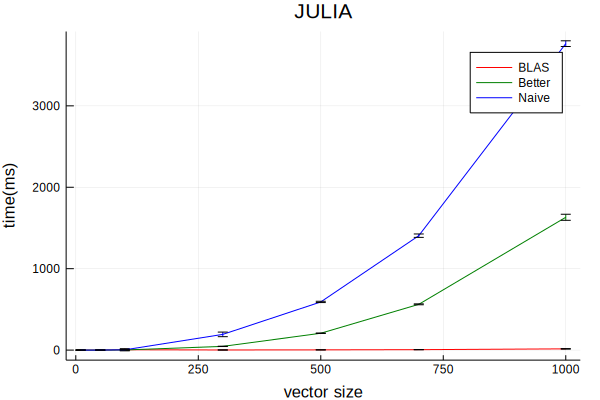

In [11]:
using Plots
plot(df2[:Size],df2[:3], group = df2[:2], yerr = df2[:Std], colour = [:red :green :blue],
     xlabel = "vector size", ylabel="time(ms)", title="JULIA")

<b>Zadanie2 <br></b>
Napisać w języku C:

- naiwną metodę mnożenia macierzy (wersja 1) 
- ulepszoną za pomocą zamiany pętli metodę mnożenia macierzy (wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
- skorzystać z  możliwości BLAS dostępnego w GSL(wersja 3). 

Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1.(osobno niż p.1). (Dla chętnych) sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu.

In [ ]:
#include <stdio.h>
#include <gsl/gsl_blas.h>
#include <time.h>

double PERMILI = CLOCKS_PER_SEC/1000;

void naive_multiplication(double** A, double** B, int n){
double** C = malloc(n * sizeof * C);
        for (int m=0; m<n; m++){
        C[m] = malloc(n * sizeof *C[m]);
        }
    for(int i = 0; i< n; i++)
            C[i][i] = 0;
clock_t t = clock();
  for (int j=0; j < n; j++)
    for (int k=1; k < n; k++)
        for (int i=1; i < n; i++)
           C[i][j]=C[i][j]+A[i][k]*B[k][j];
t = clock() - t;
double time_taken = ((double)t)/PERMILI;
printf("%f", time_taken);
}

void better_multiplication(double** A, double** B, int n){
double** C = malloc(n * sizeof * C);
        for (int m=0; m<n; m++){
        C[m] = malloc(n * sizeof *C[m]);
        }
    for(int i = 0; i< n; i++)
            C[i][i] = 0;

clock_t t = clock();
  for (int i=0; i < n; i++)
    for (int j=1; j < n; j++)
        for (int k=1; k < n; k++)
           C[i][j]=C[i][j]+A[i][k]*B[k][j];
t = clock() - t;
    double time_taken = ((double)t)/PERMILI;
    printf("%f", time_taken);
}

void blas_multiplication(int n){
    gsl_matrix *A = gsl_matrix_alloc(n,n);
    gsl_matrix *B = gsl_matrix_alloc(n,n);
    gsl_matrix *C = gsl_matrix_alloc(n,n);
    for(int i = 0; i < n; i++){
    for(int j = 0; j < n; j++){
        gsl_matrix_set(A, i, j, 1.03*i*j);
        gsl_matrix_set(B, i, j, 2.03*i*j);

   }
    }
    clock_t t = clock();
    gsl_blas_dgemm (CblasNoTrans, CblasNoTrans,
                  1.0, A, B,
                  0.0, C);
    t = clock() - t;
    double time_taken = ((double)t)/PERMILI;
    printf("%f", time_taken);
    gsl_matrix_free(A);
    gsl_matrix_free(B);
    gsl_matrix_free(C);
}

int main (void)
{
    // printf("Size;Type;Probe1;Probe2;Probe3;Probe4;Probe5;Probe6;Probe7;Probe8;Probe9;Probe10");
    for(int i = 1000; i<1001; i+=200 ){
        double** A= malloc(i * sizeof * A);
        for (int m=0; m<i; m++){
        A[m] = malloc(i * sizeof *A[m]);
        }
        double**B = malloc(i * sizeof * B);
        for (int m=0; m<i; m++){
        B[m] = malloc(i * sizeof *B[m]);
        }
        for(int k = 0; k<i; k++){
            A[k][k] = k*i*0.74;
            B[k][k] = k*i*0.68;
        }
        printf("\n%i;Naive",i);
        for(int k = 0; k<10; k++){
            printf(";");
            naive_multiplication(A,B,i); 
        }
        printf("\n%i;Better",i);
        for(int k = 0; k<10; k++){
            printf(";");
            better_multiplication(A,B,i);
        }
        printf("\n%i;BLAS",i);
        for(int k = 0; k<10; k++){
            printf(";");
            blas_multiplication(i);
        }
    }
}

In [14]:
using CSV
df3 = CSV.read("blas4.csv", delim=";")

,Size,Type,Probe1,Probe2,Probe3,Probe4,Probe5,Probe6,Probe7,Probe8,Probe9,Probe10
,Int64⍰,String⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,100,Naive,5.157,5.186,5.401,5.192,5.412,6.495,5.229,5.249,5.109,5.137
2,100,Better,5.705,5.032,4.887,4.872,5.122,4.934,4.908,4.846,4.842,4.845
3,100,BLAS,0.81,0.774,0.797,0.774,0.774,0.774,0.805,0.777,0.774,0.773
4,200,Naive,57.759,51.075,50.13,47.993,48.007,47.76,48.064,48.041,47.991,47.717
5,200,Better,48.939,44.154,48.955,44.346,49.003,44.398,44.385,48.543,45.081,49.39
6,200,BLAS,5.82,8.236,6.489,6.901,5.861,6.785,5.818,5.994,5.85,5.793
7,300,Naive,211.17,171.348,172.087,197.217,171.821,171.497,177.845,171.561,172.194,177.451
8,300,Better,168.562,158.771,156.354,157.41,156.22,156.433,174.129,162.49,164.994,155.964
9,300,BLAS,20.907,20.841,19.261,18.944,18.94,18.958,19.004,18.969,18.985,20.135


In [16]:
using Statistics
using DataFrames
A=Float64[]
B=Float64[]

for i = 1:30
    push!(A,mean(df3[i,3:12]))
    push!(B,std(df3[i,3:12]))
    
end
df4=DataFrame()
df4[:Size]= df3[:Size]
df4[:Type]=df3[:Type]
df4[:TimeMean]=A
df4[:Std]=B

30-element Array{Float64,1}:
   0.4129059753072659  
   0.2640719809277599  
   0.014718091663738971
   3.1312371374763512  
   2.3882574400595917  
   0.7859143365815673  
  13.681216023357642   
   6.289846934191282   
   0.8129277950716178  
  22.924215507236507   
  19.85298937020149    
   2.4445667396175645  
  11.811289161457276   
   ⋮                   
  19.127342269060037   
   8.44466519038973    
  28.88745761591198    
  47.08130540010303    
  15.3371951111598     
   9.327889576723974   
  50.063417310891      
  11.770540165080687   
  76.98183289618106    
 479.59202124872166    
  12.295990085299005   
  11.162696399168055   

In [17]:
df4

,Size,Type,TimeMean,Std
,Int64⍰,String⍰,Float64,Float64
1,100,Naive,5.3567,0.412906
2,100,Better,4.9993,0.264072
3,100,BLAS,0.7832,0.0147181
4,200,Naive,49.4537,3.13124
5,200,Better,46.7194,2.38826
6,200,BLAS,6.3547,0.785914
7,300,Naive,179.419,13.6812
8,300,Better,161.133,6.28985
9,300,BLAS,19.4944,0.812928


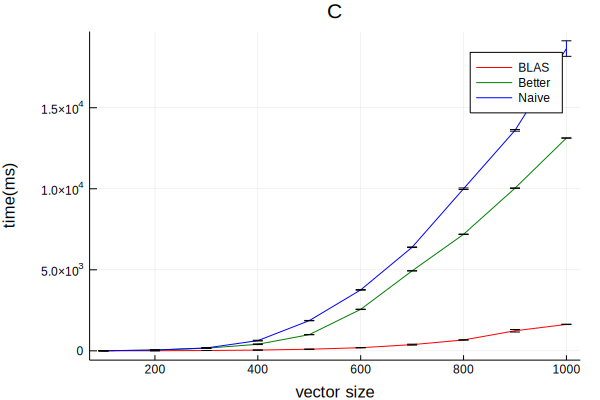

In [18]:
using Plots
plot(df4[:Size],df4[:3], group = df4[:2], yerr = df4[:Std], colour = [:red :green :blue],
     xlabel = "vector size", ylabel="time(ms)", title="C")

<b>Zadanie 3</b><br>
Użyć funkcji polyfit z pakietu Polynomials do znalezienia odpowiednich wielomianow, ktore najlepiej pasują do zależności czasowych kazdego z algorytmow. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianow do wczesniejszych wykresów.

 Resolving package versions...
  Updating `~/.julia/Project.toml`
  [f27b6e38] + Polynomials v0.5.2
  Updating `~/.julia/Manifest.toml`
  [f27b6e38] + Polynomials v0.5.2


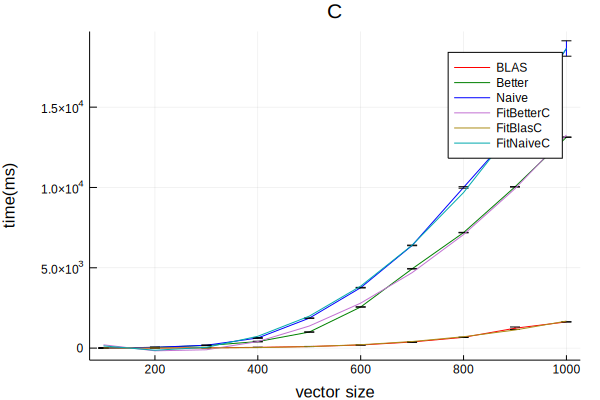

In [22]:
import Pkg; Pkg.add("Polynomials")
using Polynomials
#NAIVE C
x = collect(1:3:30); xs = map(x->df4[x,:Size],x) ;ys = map(x->df4[x,:TimeMean], x)
fitNaiveC=polyfit(xs, ys,3)

#BETTER C
xb = collect(2:3:30); xsb = map(x->df4[x,:Size],xb); ysb = map(x->df4[x,:TimeMean], xb)
fitBetterC=polyfit(xsb, ysb,3)

#BLAS C
xblas = collect(3:3:30); xsblas = map(x->df4[x,:Size],xblas); ysblas = map(x->df4[x,:TimeMean], xblas)
fitBlasC=polyfit(xsblas, ysblas,3)


Means= Float64[]
Types=Any[]
for i in [100,200,300,400,500,600,700,800,900,1000]
    push!(Means,polyval(fitNaiveC, i))
    push!(Types, "FitNaiveC")
    push!(Means,polyval(fitBetterC, i))
    push!(Types, "FitBetterC")
    push!(Means,polyval(fitBlasC, i))
    push!(Types, "FitBlasC")
end

df5 = DataFrame()
df5[:Size]=df4[:Size]
df5[:Types]= Types
df5[:Measures] = Means
df5
plot!(df5[:Size],df5[:Measures], groups=df5[:Types])


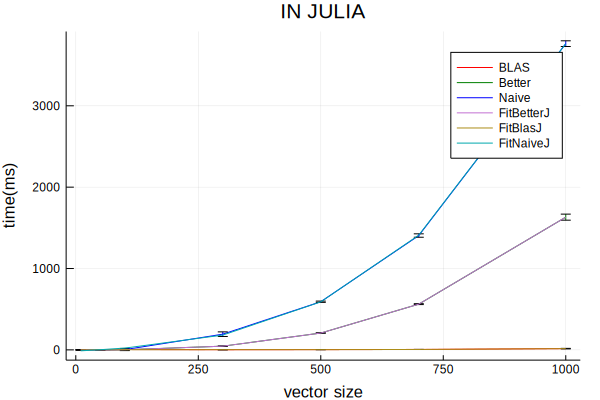

In [23]:
using Plots
plot(df2[:Size],df2[:3], group = df2[:2], yerr = df2[:Std], colour = [:red :green :blue],
     xlabel = "vector size", ylabel="time(ms)", title="IN JULIA")

using Polynomials
#NAIVE C
x = collect(1:3:21); xs = map(x->df2[x,:Size],x) ;ys = map(x->df2[x,:TimeMean], x)
fitNaiveC=polyfit(xs, ys,3)

#BETTER C
xb = collect(2:3:21); xsb = map(x->df2[x,:Size],xb); ysb = map(x->df2[x,:TimeMean], xb)
fitBetterC=polyfit(xsb, ysb,3)

#BLAS C
xblas = collect(3:3:21); xsblas = map(x->df2[x,:Size],xblas); ysblas = map(x->df2[x,:TimeMean], xblas)
fitBlasC=polyfit(xsblas, ysblas,3)


Means= Float64[]
Types=Any[]
for i in [10,50,100,300,500,700,1000]
    push!(Means,polyval(fitNaiveC, i))
    push!(Types, "FitNaiveJ")
    push!(Means,polyval(fitBetterC, i))
    push!(Types, "FitBetterJ")
    push!(Means,polyval(fitBlasC, i))
    push!(Types, "FitBlasJ")
end

df6 = DataFrame()
df6[:Size]=df2[:Size]
df6[:Types]= Types
df6[:Measures] = Means
df6
plot!(df6[:Size],df6[:Measures], groups=df6[:Types])